# How neural networks learn
Understanding the basics of neural nets and its mathmatics is an essential part working with them. I expect knowledge about vectors and matrices.<br>
In the following I will explain the most important parts to create a small and simple neural net using numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Activation function
An activation function is used in neural networks to define the outputs of neurons.<br>
The most popular activation functions are sigmoid, tanh and ReLU.

<br>
**Sigmoid:**<br>
$\sigma(z)=\frac{1}{(1+e^{-z})}$

Sigmoid neurons are similar to perceptrons, but modified that small changes in their weights and bias cause only a small change in their output. Sigmoid neurons give us flexibility of continous values between 0 and 1.<br>

<br>
**Hyperbolic tangent (Tanh):**<br>
$tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

Tanh is quit similiar to Sigmoid. The output values ranges from -1 to 1. In the case of sigmoid the output values are between 0 and 1. You can modify the sigmoid function to get the same output of tanh:<br>$tanh(z) = 2 * \sigma(2 * z) - 1$<br>

<br>
**Rectified linear unit (ReLU):**<br>
$relu(z) = max(0,z)$

ReLU is on of the most popular activation function for deep neural networks.<br>
One drawback of ReLU is when the weighted input to a rectified linear unit is negative. This causes in the gradient vanishes and so the neuron stops learning entirely. As an example:<br>$relu(-100.99) = 0$

Below you can find some visuzalitions of this three functions:

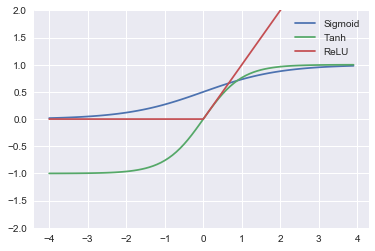

In [2]:
def tanh(z):
    return np.tanh(z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return max(0,z)

X = [x/10 for x in range(-40, 40)]

plt.plot(X, [sigmoid(x) for x in X])
plt.plot(X, [tanh(x)    for x in X])
plt.plot(X, [relu(x)    for x in X])
plt.ylim(-2.0,2.0)
plt.legend(['Sigmoid', 'Tanh', 'ReLU'])
plt.show()

## Computing the outputs by forward propagation

In a feedforward neural net we use $x$ as input to produce an output $ý$. The input provides inital information that propagates through the network to the output layer.

Consider we have a network with two inputs of **x = [0.1, 0.9]**, a hidden layer with two units and one final output. Besides I add bias neurons (orange nodes) on each layer except input to get more flexibility to learn. To keep it simple and reproducible I intitalized all weights with fixed values.<br>
Normally they will be intitialized randomly.

As final output you get the value of **0.618**

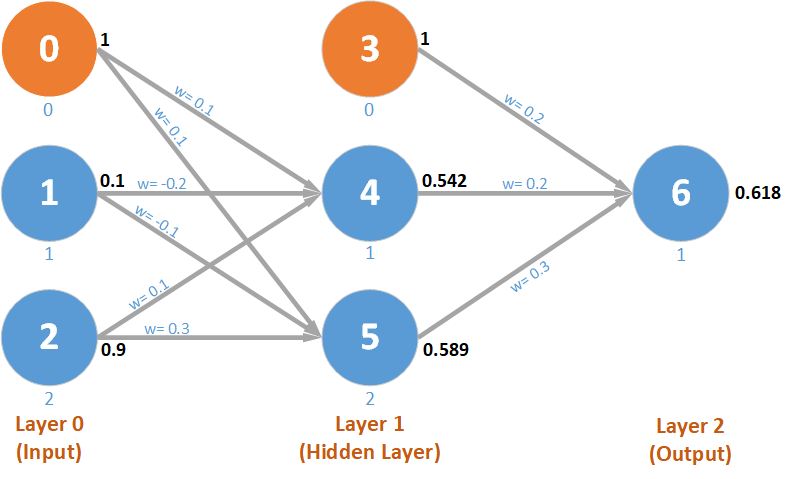

To get the prediction of 0.618 you can execute this code:

In [3]:
layers = [2,2,1]

biases = [
    [[0.1],[0.1]],              # on first hidden layer
    [[0.2]]                     # on second layer (here output layer)
]

weights =[
    [[-0.2, 0.1], [-0.1, 0.3]], # on first hidden layer
    [[0.2, 0.3]]                # on second layer (here output layer)
]

def forward_propagation(a):
    layer_inputs = []
    activations  = []
    for b, w in zip(biases, weights):
        z = np.dot(w,a) + b
        layer_inputs.append(z)
        a = sigmoid(z)
        activations.append(a)
    return layer_inputs, activations

X = np.array([ [0.1, 0.9] ]).T

layer_inputs, activations = forward_propagation(X)

for idx, i in enumerate(zip(layer_inputs, activations)):
    print('-- Layer %i --' % (idx+1))
    print('Inputs:\n',  i[0])
    print('Outputs:\n', i[1])
    print('\n')

-- Layer 1 --
Inputs:
 [[0.17]
 [0.36]]
Outputs:
 [[0.54239794]
 [0.58904043]]


-- Layer 2 --
Inputs:
 [[0.48519172]]
Outputs:
 [[0.61897307]]




What's happening is we forward the input of **x = [0.1, 0.9]** to the output.

First we calculate the inputs $net_j$ to the first hidden layer with it's outputs by using sigmoid as activation function $\sigma(net_j)$. We use two definitions:

$w_{i,j}$ is defined as the weight between the neuron $i$ and $j$<br>
$x_i$ is defined as the input of neuron $i$


The input $net_j$ to a neuron is the weighted sum of outputs $o_i$ of previous neurons. So we came up with the following equations:

$net_j = w_{0,j} + \sum\limits_{i=1}^n x_i*w_{i,j}$<br>
$o_j = \frac{1}{(1+e^{-net_{j}})}$<br>
<br>

If we placed in the values for the hidden layer:

$net_4 = 0.1 + (0.1 * -0.2) + (0.9 * 0.1)= 0.17$<br>
$o_4 = \frac{1}{(1+e^{-0.17})} = 0.542$<br>
<br>

$net_5 = 0.1 + (0.1 * -0.1) + (0.9 * 0.3)= 0.36$<br>
$o_5 = \frac{1}{(1+e^{-0.17})} = 0.589$<br>

_________________
The results from the hidden layer is the input to the next layer:

$net_6 = 0.2 + (0.542 * 0.2) + (0.589 * 0.3) = 0.4851$<br>
$o_6 = \frac{1}{(1+e^{-0.4851})} = 0.6189$

As you can see above, the final output is $ý=0.6189$

Now we have to compare this result of $ý$ with the expected value of $y$ to measure the output error.

## Back propagation

The goal of backpropagation is to compute the partial derivatives of the cost function. The objective is to get the ground truth by changing the weights of the network. In the previous example we used the sigmoid activation function.

In [4]:
y   = [0.9]
eta = 0.25

def back_propagation(y,verbose=0):
    global biases, weights
    new_b = [np.zeros(np.array(b).shape) for b in biases]
    new_w = [np.zeros(np.array(w).shape) for w in weights]
    
    # Getting error of final output
    error = (y - activations[-1]) * sigmoid(layer_inputs[-1]) * (1 - sigmoid(layer_inputs[-1]))
    new_b[-1] = error
    new_w[-1] = np.dot(error, activations[-2].transpose())
    
    if verbose == 1:
        print('Error of final output:', error)
        print('\nNew bias weight (3):', error * eta + biases[-1])
        print('\nNew weights (4 & 5):\n', activations[-2].T * error * eta + np.array(weights[-1]))

    for layer in range(2, len(layers)):
        z = layer_inputs[-layer]
        sp = sigmoid(z) * (1 - sigmoid(z))
        error = np.dot(np.array(weights[-layer+1]).T, error) * sp
        new_b[-layer] = error
        new_w[-layer] = np.dot(error, activations[-layer].T)
        
        if verbose == 1:
            print('\nError of units (4 & 5):\n', error)
            print('\nNew bias weights (0):\n', error * eta + np.array(biases[-layer]))
            print('\nNew weights (0):\n', (np.array(new_w) * eta + weights)[0])
    
    # Updating the weights
    biases  = np.array(new_b) * eta + biases
    weights = np.array(new_w) * eta + weights
    
    return biases, weights
    
biases, weights = back_propagation(y, verbose=1)

Error of final output: [[0.06627891]]

New bias weight (3): [[0.21656973]]

New weights (4 & 5):
 [[0.20898739 0.30976024]]

Error of units (4 & 5):
 [[0.00329012]
 [0.00481328]]

New bias weights (0):
 [[0.10082253]
 [0.10120332]]

New weights (0):
 [[-0.19955386  0.1004845 ]
 [-0.09934732  0.3007088 ]]


Printing all values

In [5]:
print('Biases:\n',biases)

print('\nWeights:\n',weights)

Biases:
 [array([[0.10082253],
       [0.10120332]]) array([[0.21656973]])]

Weights:
 [array([[-0.19955386,  0.1004845 ],
       [-0.09934732,  0.3007088 ]])
 array([[0.20898739, 0.30976024]])]


To understand the code above you can use following equations of back propagation to verify the result. This step is the most important one and sometimes a bit confusing.

We start with the last layer (output layer). $t_k$ is the correct target value of unit $k$. The actual predicted value by the neural net on unit $k$ is $o_k$. This lead us to the following equation to get the error on the **last layer**:<br>
$\delta_k = (t_k - o_k) * o_k * (1 - o_k)$

This error is important for changing the weights between the last layer of unit $k$ and unit $j$ of the layer before:<br>
$w_{j,k}^{new} = \eta * \delta_k * o_j + w_{j,k}^{old}$

______________
Calculating manually:

$\delta_6 = (0.9 - 0.619) * 0.619 * (1 - 0.619) = 0.0662$

$w_{3,6}^{new} = 0.25 * 0.066 * 1.000 + 0.2 = 0.2165$

$w_{4,6}^{new} = 0.25 * 0.066 * 0.542 + 0.2 = 0.2089$

$w_{5,6}^{new} = 0.25 * 0.066 * 0.589 + 0.3 = 0.3097$

______________

On the layer before the output you have to use another but quite similiar equation for getting the error:<br>
$\delta_j = o_k * (1 - o_k) * \sum\limits_{j=0}^m \delta_k * w_{j,k}$

Using the error is the same like above:<br>
$w_{i,j}^{new} = \eta * \delta_j * o_i + w_{i,j}^{old}$


$\delta_4 = 0.542 * (1 - 0.542) * (0.066 * 0.2) = 0.0033$

$w_{0,4}^{new} = 0.25 * 0.0033 * 1.000 + 0.1 = 0.1008$

$w_{1,4}^{new} = 0.25 * 0.0033 * 0.542 - 0.2 = -0.1995$

$w_{2,4}^{new} = 0.25 * 0.0033 * 0.589 + 0.1 = 0.1004$

______________

$δ_5 = 0.589 * (1 - 0.589) * (0.066 * 0.3) = 0.0048$

$w_{0,5}^{new} = 0.25 * 0.0048 * 1.000 + 0.1 = 0.1012$

$w_{1,5}^{new} = 0.25 * 0.0048 * 0.542 - 0.1 = -0.0993$

$w_{2,5}^{new} = 0.25 * 0.0048 * 0.589 + 0.3 = 0.3007$

______________

Through this step of back propagation we changed the weights of the neural net:

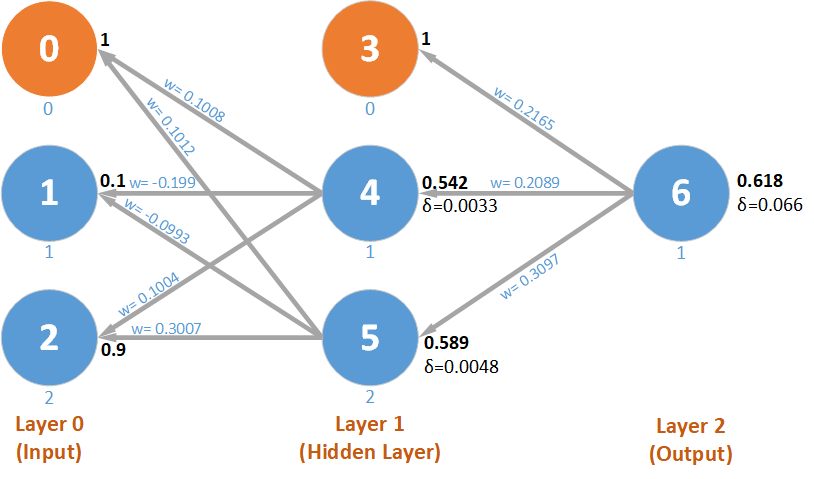

If you run `forward_propagation()` and `back_propagation()` in loop, the network will change the weights according to $y$.<br>
I add some other values to make it more useable.

In [6]:
X = np.array([ [0.1, 0.9], [1.0,1.0], [0.1,0.1] ]).T
y = np.array([0.9, 1.0, 0.1])

for i in range(500):
    _, activations = forward_propagation(X)
    back_propagation(y)
    
for j in (activations[-1]):
    print('Final output:',j)

Final output: [0.90551059 0.97500181 0.11433171]


As you can see after 500 iterations the final output seems to be very close to the target value.